<a href="https://colab.research.google.com/github/Marcooos05/Algo-Trading-Journal/blob/main/NVDADaily_SMA30_SMA90strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#This program uses the simple moving average crossover to buy and sell stock

In [ ]:
#Importing Relevant Libraries
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [ ]:
#Load stock price data
from google.colab import files
uploaded = files.upload()

In [ ]:
#Store data
NVDA = pd.read_csv('NVDA.csv')
#Show the data
NVDA

,Date,Open,High,Low,Close,Adj Close,Volume
0,2/1/2020,59.687500,59.977501,59.180000,59.977501,59.741241,23753600
1,3/1/2020,58.775002,59.457500,58.525002,59.017502,58.785023,20538400
2,6/1/2020,58.080002,59.317501,57.817501,59.264999,59.031544,26263600
3,7/1/2020,59.549999,60.442501,59.097500,59.982498,59.746220,31485600
4,8/1/2020,59.939999,60.509998,59.537498,60.095001,59.858280,27710800
...,...,...,...,...,...,...,...
1102,20/5/2024,937.500000,952.000000,934.400024,947.799988,947.799988,31876400
1103,21/5/2024,935.989990,954.000000,931.799988,953.859985,953.859985,32894600
1104,22/5/2024,954.590027,960.200012,932.489990,949.500000,949.500000,54864800
1105,23/5/2024,1020.280029,1063.199951,1015.200012,1037.989990,1037.989990,83506500


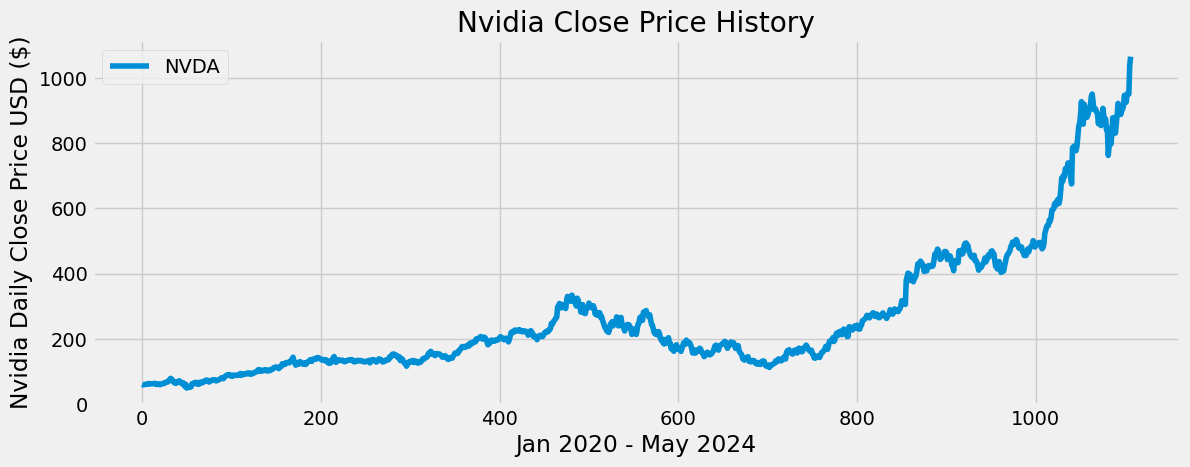

In [ ]:
#Visualize data
plt.figure(figsize = (12.5, 4.5))
plt.plot(NVDA['Close'], label = "NVDA")
plt.title('Nvidia Close Price History')
plt.xlabel('Jan 2020 - May 2024')
plt.ylabel('Nvidia Daily Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

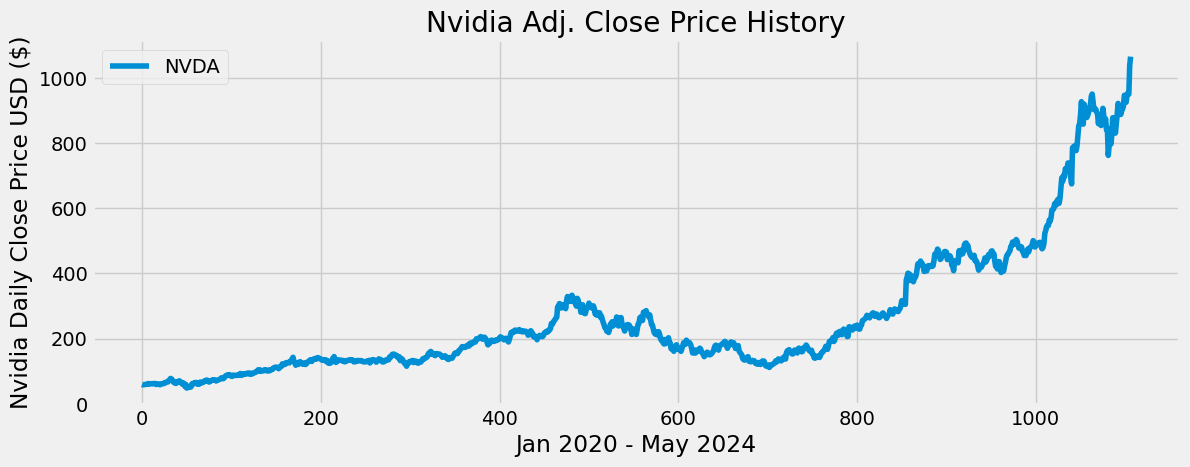

In [ ]:
#Visualize data
plt.figure(figsize = (12.5, 4.5))
plt.plot(NVDA['Adj Close'], label = "NVDA")
plt.title('Nvidia Adj. Close Price History')
plt.xlabel('Jan 2020 - May 2024')
plt.ylabel('Nvidia Daily Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Creating a Simple Moving Average with a 30 day window based on Adj. close price
SMA30 = pd.DataFrame()
SMA30['Adj Close'] = NVDA['Adj Close'].rolling(window = 30).mean()
SMA30

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1102,874.347331
1103,877.691331
1104,880.328331
1105,884.722664


In [ ]:
#Creating a Simple Moving Average with a 90 day window based on Adj. close price
SMA90 = pd.DataFrame()
SMA90['Adj Close'] = NVDA['Adj Close'].rolling(window = 90).mean()
SMA90

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1102,802.386688
1103,806.894085
1104,811.365481
1105,816.634330


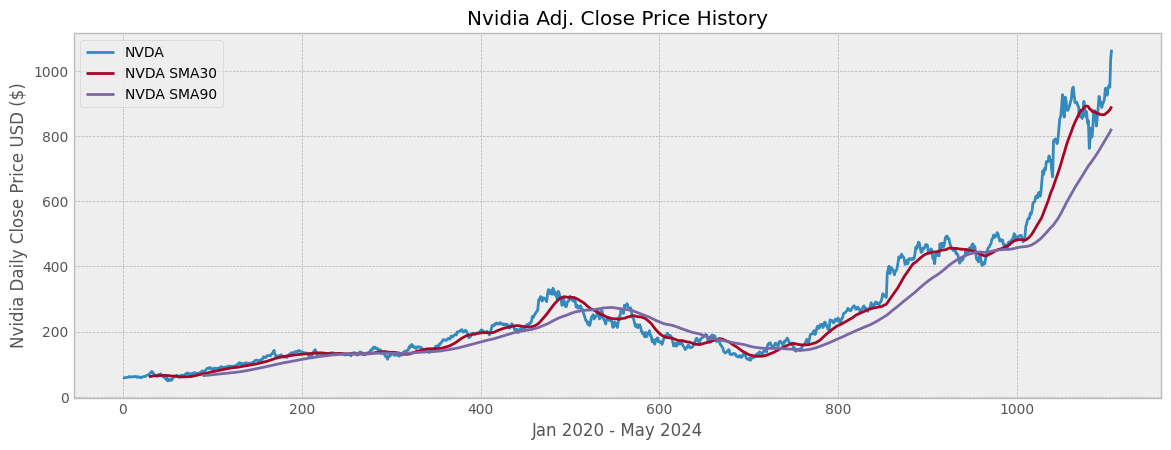

In [ ]:
#Visualise SMA30 and SMA90 with Adj. Close price data
plt.figure(figsize = (12.5, 4.5))
plt.plot(NVDA['Adj Close'], label = "NVDA")
plt.plot(SMA30['Adj Close'], label = "NVDA SMA30")
plt.plot(SMA90['Adj Close'], label = "NVDA SMA90")
plt.title('Nvidia Adj. Close Price History')
plt.xlabel('Jan 2020 - May 2024')
plt.ylabel('Nvidia Daily Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()

In [ ]:
#Create new data frame to store all the data
data = pd.DataFrame()
data['NVDA'] = NVDA['Adj Close']
data['SMA30'] = SMA30['Adj Close']
data['SMA90'] = SMA90['Adj Close']
data

,NVDA,SMA30,SMA90
0,59.741241,NaN,NaN
1,58.785023,NaN,NaN
2,59.031544,NaN,NaN
3,59.746220,NaN,NaN
4,59.858280,NaN,NaN
...,...,...,...
1102,947.799988,874.347331,802.386688
1103,953.859985,877.691331,806.894085
1104,949.500000,880.328331,811.365481
1105,1037.989990,884.722664,816.634330


In [ ]:
#Create a function for buy and sell signal
def buy_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  trade = 0 #variable to signify if user is in a long/short trade

  for i in range(len(data)):
    if data['SMA30'][i] > data['SMA90'][i] and trade == 0:
      sigPriceBuy.append(data['SMA30'][i])
      sigPriceSell.append(np.nan)
      trade = 1
    elif data['SMA30'][i] < data['SMA90'][i] and trade == 1:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(data['SMA30'][i])
      trade = 0
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)
  return (sigPriceBuy, sigPriceSell)

In [ ]:
buy_sell_arr = buy_sell(data)
data['Buy_Signal_Price'] = buy_sell_arr[0]
data['Sell_Signal_Price'] = buy_sell_arr[1]
data

,NVDA,SMA30,SMA90,Buy_Signal_Price,Sell_Signal_Price
0,59.741241,NaN,NaN,NaN,NaN
1,58.785023,NaN,NaN,NaN,NaN
2,59.031544,NaN,NaN,NaN,NaN
3,59.746220,NaN,NaN,NaN,NaN
4,59.858280,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1102,947.799988,874.347331,802.386688,NaN,NaN
1103,953.859985,877.691331,806.894085,NaN,NaN
1104,949.500000,880.328331,811.365481,NaN,NaN
1105,1037.989990,884.722664,816.634330,NaN,NaN


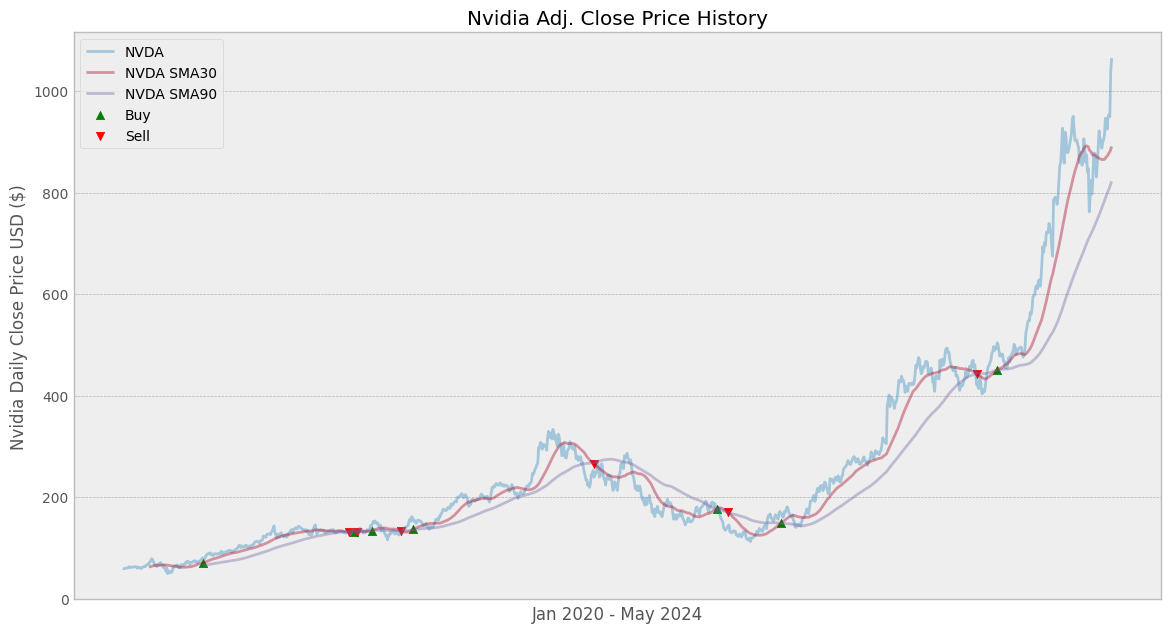

In [ ]:
#Visualise SMA30 and SMA90 with Adj. Close price data and Buy & Sell Signals
plt.figure(figsize = (12.5, 7))
plt.plot(data['NVDA'], label = "NVDA", alpha = 0.40)
plt.plot(data['SMA30'], label = "NVDA SMA30", alpha = 0.40)
plt.plot(data['SMA90'], label = "NVDA SMA90", alpha = 0.40)
plt.scatter(data.index, data['Buy_Signal_Price'], label = 'Buy', marker = '^', color = 'green')
plt.scatter(data.index, data['Sell_Signal_Price'], label = 'Sell', marker = 'v', color = 'red')
plt.title('Nvidia Adj. Close Price History')
plt.xlabel('Jan 2020 - May 2024')
plt.xticks([])
plt.ylabel('Nvidia Daily Close Price USD ($)')
plt.legend(loc='upper left')
plt.show()